In [1]:
import os
import time
from collections import deque
from importlib import reload
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

import utilities

In [2]:
sales = utilities.load_and_preprocess()

In [3]:
agg_sales = utilities.aggregate_monthly(sales)

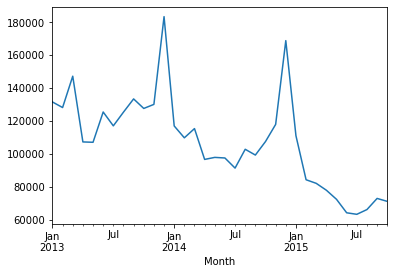

In [4]:
agg_sales.groupby(level=0).item_cnt_month.sum().plot()

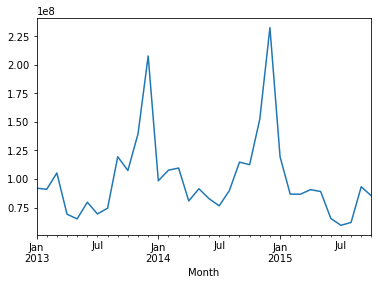

In [5]:
agg_sales.groupby(level=0).apply(lambda x: (x.item_cnt_month*x.item_price).sum()).plot()

In [7]:
agg_sales.reset_index()[['Month','shop_id', 'item_id']].nunique()

Month         34
shop_id       60
item_id    21807
dtype: int64

In [20]:
agg_sales.reset_index().groupby('Month')[['shop_id', 'item_id']].nunique()

,shop_id,item_id
Month,,
2013-01,45,8115
2013-02,46,8168
2013-03,46,8302
2013-04,46,8145
2013-05,45,8339
2013-06,46,8478
2013-07,46,8405
2013-08,45,8031
2013-09,45,7876


In [22]:
unique_by_shop = agg_sales.reset_index().groupby('shop_id')[['Month', 'item_id']].nunique()

In [23]:
unique_by_shop.sort_values(by='Month')

,Month,item_id
shop_id,,
11,1,371
36,1,258
0,2,3600
20,2,746
1,2,2523
8,4,1909
23,4,2949
9,4,1404
32,7,3299


In [24]:
unique_by_shop.sort_values(by='item_id')

,Month,item_id
shop_id,,
36,1,258
11,1,371
20,2,746
40,11,817
9,4,1404
34,16,1860
33,9,1900
8,4,1909
55,30,1985


In [8]:
profit_per_shop = agg_sales.groupby(level=[0,1]).apply(lambda x: (x.item_cnt_month*x.item_price).sum()).unstack(level=1).fillna(0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c14e163668>,
 'caps': [<matplotlib.lines.Line2D at 0x1c14e1585f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c14e163940>],
 'medians': [<matplotlib.lines.Line2D at 0x1c14e152c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c14e152550>],
 'means': []}

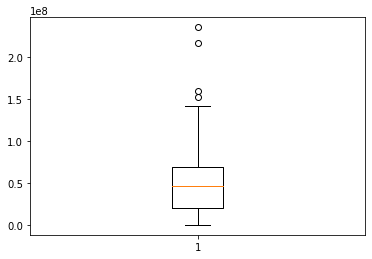

In [13]:
plt.boxplot(profit_per_shop.sum().sort_values())

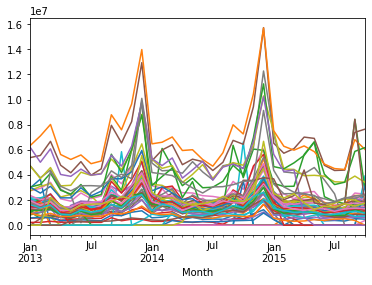

In [32]:
profit_per_shop.plot(legend=False)